## Variational Autoencoders on Poor Sevens 

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import tensorflow as tf
import pickle
import random

In [0]:
with open('gdrive/My Drive/Deep Learning HW 4/hw4_tr7.pkl', 'rb') as fi:
    train_sevens = pickle.load(fi)

with open('gdrive/My Drive/Deep Learning HW 4/hw4_te7.pkl', 'rb') as fi:
    test_sevens = pickle.load(fi)


In [0]:
train_sevens.shape,test_sevens.shape

In [0]:
train_sevens = train_sevens.reshape((6265, 784))
train_sevens.shape




#### Network Architechture for Encoder and Decoder Network: <br>
-> Input dimensions = 784 <br> 
-> 3 hidden layers with 512 hidden units each <br>
-> Xavier initialization for biases and weights<br>
-> RMSprop optimizer and Reconstruction loss + KL divergence as the loss function.<br>
-> ReLu,ReLu,tanh as the encoder network activations.<br>
-> tanh,ReLu and sigmoid activation function for input,middle and utput layer for the decoder network<br>
-> Learning rate = 0.001<br>
-> Latent dimensions are 4.

In [0]:

batch_size = 64
hidden_dim = 512
latent_dim = 4
#GLorit initialization is tested but not used.
def glorot_init(shape):
    return tf.random_normal(shape=shape, stddev=1. / tf.sqrt(shape[0] / 2.))

In [0]:
random.seed(50)


encoder_h1 = {'w':tf.Variable(glorot_init([784,hidden_dim])),'b':tf.Variable(glorot_init([hidden_dim]))}
encoder_h2 = {'w':tf.Variable(glorot_init([hidden_dim,hidden_dim])),'b':tf.Variable(glorot_init([hidden_dim]))}
encoder_h3 = {'w':tf.Variable(glorot_init([hidden_dim,hidden_dim])),'b':tf.Variable(glorot_init([hidden_dim]))}
encoder_h4 = {'w':tf.Variable(glorot_init([hidden_dim,hidden_dim])),'b':tf.Variable(glorot_init([hidden_dim]))}
encoder_h5 = {'w':tf.Variable(glorot_init([hidden_dim,hidden_dim])),'b':tf.Variable(glorot_init([hidden_dim]))}


z_mean = {'w':tf.Variable(glorot_init([hidden_dim,latent_dim])),'b':tf.Variable(glorot_init([latent_dim]))}
z_std = {'w':tf.Variable(glorot_init([hidden_dim,latent_dim])),'b':tf.Variable(glorot_init([latent_dim]))}


decoder_h1 = {'w':tf.Variable(glorot_init([latent_dim,hidden_dim])),'b':tf.Variable(glorot_init([hidden_dim]))}
decoder_h2 = {'w':tf.Variable(glorot_init([hidden_dim,hidden_dim])),'b':tf.Variable(glorot_init([hidden_dim]))}
decoder_h3 = {'w':tf.Variable(glorot_init([hidden_dim,hidden_dim])),'b':tf.Variable(glorot_init([hidden_dim]))}
decoder_h4 = {'w':tf.Variable(glorot_init([hidden_dim,hidden_dim])),'b':tf.Variable(glorot_init([hidden_dim]))}
decoder_h5 = {'w':tf.Variable(glorot_init([hidden_dim,hidden_dim])),'b':tf.Variable(glorot_init([hidden_dim]))}

decoder_out = {'w':tf.Variable(glorot_init([hidden_dim,784])),'b':tf.Variable(glorot_init([784]))}

#(input_data*weights) + biases
x = tf.placeholder(tf.float32, shape=[None, 784])
le1 = tf.add(tf.matmul(x, encoder_h1['w']),encoder_h1['b'])
le1 = tf.nn.relu(le1)

le2 = tf.add(tf.matmul(le1, encoder_h2['w']),encoder_h2['b'])
le2 = tf.nn.relu(le2)

le3 = tf.add(tf.matmul(le2, encoder_h3['w']),encoder_h3['b'])
le3 = tf.nn.tanh(le3)

lz_mean = tf.matmul(le3, z_mean['w']) + z_mean['b']
lz_std = tf.matmul(le3, z_std['w']) + z_std['b']

eps = tf.random_normal(tf.shape(lz_std), dtype=tf.float32, mean=0., stddev=1.0,
                       name='epsilon')

z = lz_mean + tf.exp(lz_std / 2) * eps

lde1 = tf.matmul(z, decoder_h1['w']) + decoder_h1['b']
lde1 = tf.nn.tanh(lde1)
lde2 = tf.matmul(lde1, decoder_h2['w']) + decoder_h2['b']
lde2 = tf.nn.relu(lde2)
lde3 = tf.matmul(lde2, decoder_h3['w']) + decoder_h3['b']
lde3 = tf.nn.relu(lde3)

dec = tf.matmul(lde3, decoder_out['w']) + decoder_out['b']
dec = tf.nn.sigmoid(dec)


In [0]:
random.seed(50)

xavier_init = tf.contrib.layers.xavier_initializer()

encoder_h1 = {'w':tf.Variable(xavier_init([784,hidden_dim])),'b':tf.Variable(xavier_init([hidden_dim]))}
encoder_h2 = {'w':tf.Variable(xavier_init([hidden_dim,hidden_dim])),'b':tf.Variable(xavier_init([hidden_dim]))}
encoder_h3 = {'w':tf.Variable(xavier_init([hidden_dim,hidden_dim])),'b':tf.Variable(xavier_init([hidden_dim]))}
encoder_h4 = {'w':tf.Variable(xavier_init([hidden_dim,hidden_dim])),'b':tf.Variable(xavier_init([hidden_dim]))}
encoder_h5 = {'w':tf.Variable(xavier_init([hidden_dim,hidden_dim])),'b':tf.Variable(xavier_init([hidden_dim]))}

z_mean = {'w':tf.Variable(xavier_init([hidden_dim,latent_dim])),'b':tf.Variable(xavier_init([latent_dim]))}
z_std = {'w':tf.Variable(xavier_init([hidden_dim,latent_dim])),'b':tf.Variable(xavier_init([latent_dim]))}

decoder_h1 = {'w':tf.Variable(xavier_init([latent_dim,hidden_dim])),'b':tf.Variable(xavier_init([hidden_dim]))}
decoder_h2 = {'w':tf.Variable(xavier_init([hidden_dim,hidden_dim])),'b':tf.Variable(xavier_init([hidden_dim]))}
decoder_h3 = {'w':tf.Variable(xavier_init([hidden_dim,hidden_dim])),'b':tf.Variable(xavier_init([hidden_dim]))}
decoder_h4 = {'w':tf.Variable(xavier_init([hidden_dim,hidden_dim])),'b':tf.Variable(xavier_init([hidden_dim]))}
decoder_h5 = {'w':tf.Variable(xavier_init([hidden_dim,hidden_dim])),'b':tf.Variable(xavier_init([hidden_dim]))}

decoder_out = {'w':tf.Variable(xavier_init([hidden_dim,784])),'b':tf.Variable(xavier_init([784]))}

#(input_data*weights) + biases
x = tf.placeholder(tf.float32, shape=[None, 784])
le1 = tf.add(tf.matmul(x, encoder_h1['w']),encoder_h1['b'])
le1 = tf.nn.relu(le1)

le2 = tf.add(tf.matmul(le1, encoder_h2['w']),encoder_h2['b'])
le2 = tf.nn.relu(le2)

le3 = tf.add(tf.matmul(le2, encoder_h3['w']),encoder_h3['b'])
le3 = tf.nn.tanh(le3)



lz_mean = tf.matmul(le3, z_mean['w']) + z_mean['b']
lz_std = tf.matmul(le3, z_std['w']) + z_std['b']

eps = tf.random_normal(tf.shape(lz_std), dtype=tf.float32, mean=0., stddev=1.0,
                       name='epsilon')

z = lz_mean + tf.exp(lz_std / 2) * eps

lde1 = tf.matmul(z, decoder_h1['w']) + decoder_h1['b']
lde1 = tf.nn.tanh(lde1)
lde2 = tf.matmul(lde1, decoder_h2['w']) + decoder_h2['b']
lde2 = tf.nn.relu(lde2)
lde3 = tf.matmul(lde2, decoder_h3['w']) + decoder_h3['b']
lde3 = tf.nn.relu(lde3)

dec = tf.matmul(lde3, decoder_out['w']) + decoder_out['b']
dec = tf.nn.sigmoid(dec)


In [0]:

# Reconstruction loss
encode_decode_loss = x * tf.log(1e-10 + dec) \
                      + (1 - x) * tf.log(1e-10 + 1 - dec)

encode_decode_loss = -tf.reduce_sum(encode_decode_loss, 1)

# KL Divergence loss
kl_div_loss = 1 + lz_std - tf.square(lz_mean) - tf.exp(lz_std)
kl_div_loss = -0.5 * tf.reduce_sum(kl_div_loss, 1)

cost_func = tf.reduce_mean(encode_decode_loss + kl_div_loss) 
optimizer = tf.train.RMSPropOptimizer(0.001).minimize(cost_func)

init = tf.global_variables_initializer()

In [0]:
sess = tf.Session()
sess.run(init)

n_epochs = 50
for epoch in range(n_epochs):
      epoch_loss = 0
      for i in range(int(train_sevens.shape[0]/batch_size)):
        epoch_x = train_sevens[i*batch_size : (i+1)*batch_size]
        _,c = sess.run([optimizer,cost_func], feed_dict = {x:epoch_x})
        epoch_loss += c
      print('epoch',epoch,'loss',epoch_loss)


epoch 0 loss 26779.034271240234
epoch 1 loss 16917.709091186523
epoch 2 loss 14058.269409179688
epoch 3 loss 13304.18881225586
epoch 4 loss 12922.327285766602
epoch 5 loss 12447.424270629883
epoch 6 loss 12132.443450927734
epoch 7 loss 11881.341743469238
epoch 8 loss 11720.571884155273
epoch 9 loss 11603.340255737305
epoch 10 loss 11492.073936462402
epoch 11 loss 11387.847312927246
epoch 12 loss 11314.856826782227
epoch 13 loss 11239.817192077637
epoch 14 loss 11162.21605682373
epoch 15 loss 11118.288543701172
epoch 16 loss 11043.099411010742
epoch 17 loss 10996.289840698242
epoch 18 loss 10947.983200073242
epoch 19 loss 10892.245010375977
epoch 20 loss 10857.331909179688
epoch 21 loss 10835.874725341797
epoch 22 loss 10788.102699279785
epoch 23 loss 10755.126167297363
epoch 24 loss 10710.842010498047
epoch 25 loss 10701.381477355957
epoch 26 loss 10659.526916503906
epoch 27 loss 10624.833969116211
epoch 28 loss 10600.913635253906
epoch 29 loss 10577.37516784668
epoch 30 loss 10558.043

In [0]:
dec_input = tf.placeholder(tf.float32, shape=[None, latent_dim])
#Decoder network
dec1 = tf.matmul(dec_input, decoder_h1['w']) + decoder_h1['b']
dec1 = tf.nn.tanh(dec1)
dec2 = tf.matmul(dec1, decoder_h2['w']) + decoder_h2['b']
dec2 = tf.nn.relu(dec2)
dec3 = tf.matmul(dec2, decoder_h3['w']) + decoder_h3['b']
dec3 = tf.nn.relu(dec3)
deco = tf.matmul(dec3, decoder_out['w']) + decoder_out['b']
deco = tf.nn.sigmoid(deco)

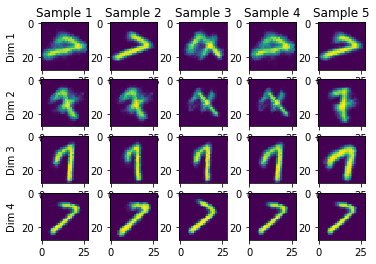

In [0]:
image_samples = 5
fig, axis = plt.subplots(latent_dim, image_samples)
for i in range(latent_dim):
  latent_image = np.tile(np.random.randn(1, latent_dim), reps=[1, 1])
  partial_sample = np.delete(latent_image, i, axis=1)
  for j in range(image_samples):
    latent_image = np.tile(np.random.randn(1, 1), reps=[1, 1])
    new_latent_image = np.hstack((partial_sample[:,:i], latent_image, partial_sample[:,i:]))
    pred_image = sess.run(deco, feed_dict={dec_input: new_latent_image})
    axis[i,j].imshow(pred_image.reshape(28, 28))

attr = ['Sample 1', 'Sample 2', 'Sample 3', 'Sample 4', 'Sample 5']
rows = ['Dim 1','Dim 2 ','Dim 3','Dim 4' ]

for ax, att in zip(axis[0], attr):
  ax.set_title(att)
for ax, row in zip(axis[:,0], rows):
    ax.set_ylabel(row)
plt.show()


The images of the digits formed by the decoder have been plotted by changing the dimensions.

Each dimension has been fixed at a time and then plotting the other one. Five samples are generated for each dimension. 

In the above image the rows give the information about the different dimensions where as columns provide the information regarding the decoder output.

Looking at the images the poor sevens have a gradual rotation effect on them.
